<a href="https://colab.research.google.com/github/laolucharles1/Data-Analytics-Machine-Learning-Projects/blob/main/Classifying_images_of_dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying images of dogs and cats

# Step 1: Naively training a small convet on 2000 training samples

In [ ]:
#Instantiatiing a small convet for dogs vs cats classification
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# Configuring the model for training
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['accuracy'])

In [ ]:
# Using ImageDatagenerator to read images from Directories

train_dir = '/content/drive/MyDrive/kaggle_original_data/train'
test_dir = '/content/drive/MyDrive/kaggle_original_data/test'
validation_dir = '/content/drive/MyDrive/kaggle_original_data/validation'


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Fitting the model using a batch generator

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50)

model.save('cats_and_dogs_step_1')

<ipython-input-4-bbb500c9a8aa>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
100/100 [==============================] - 167s 2s/step - loss: 0.6903 - accuracy: 0.5318 - val_loss: 0.6759 - val_accuracy: 0.5820
Epoch 2/30
100/100 [==============================] - 142s 1s/step - loss: 0.6673 - accuracy: 0.6048 - val_loss: 0.6687 - val_accuracy: 0.5770
Epoch 3/30
100/100 [==============================] - 139s 1s/step - loss: 0.6301 - accuracy: 0.6443 - val_loss: 0.6306 - val_accuracy: 0.6400
Epoch 4/30
100/100 [==============================] - 142s 1s/step - loss: 0.5894 - accuracy: 0.6923 - val_loss: 0.6137 - val_accuracy: 0.6680
Epoch 5/30
100/100 [==============================] - 145s 1s/step - loss: 0.5393 - accuracy: 0.7219 - val_loss: 0.6225 - val_accuracy: 0.6630
Epoch 6/30
100/100 [==============================] - 141s 1s/step - loss: 0.5155 - accuracy: 0.7404 - val_loss: 0.5617 - val_accuracy: 0.7110
Epoch 7/30
100/100 [==============================] - 141s 1s/step - loss: 0.4878 - accuracy: 0.7574 - val_loss: 0.5985 - val_accuracy: 0.6820

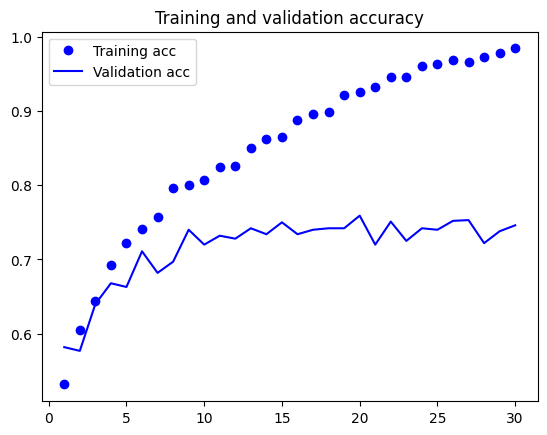

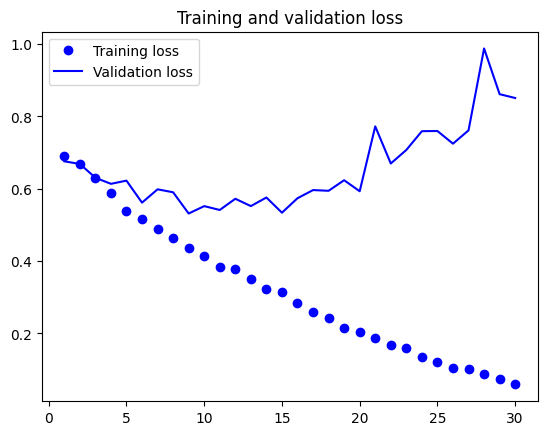

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
history_dict = history.history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
print(history.history)

{'loss': [0.690322995185852, 0.6673470735549927, 0.630072832107544, 0.5893595814704895, 0.539283275604248, 0.515503466129303, 0.48777955770492554, 0.4627600610256195, 0.4373420774936676, 0.41506239771842957, 0.3831549286842346, 0.3769506514072418, 0.35009124875068665, 0.3243543207645416, 0.3136678636074066, 0.2833036482334137, 0.2591709494590759, 0.24252468347549438, 0.216101735830307, 0.2037244290113449, 0.1865842491388321, 0.16919684410095215, 0.15923011302947998, 0.1339769810438156, 0.11988368630409241, 0.10511209070682526, 0.1018105074763298, 0.0869794636964798, 0.07394193112850189, 0.059051599353551865], 'accuracy': [0.531765878200531, 0.6048024296760559, 0.6443221569061279, 0.6923461556434631, 0.721860945224762, 0.7403702139854431, 0.7573786973953247, 0.7963982224464417, 0.7998999357223511, 0.8069034814834595, 0.8244122266769409, 0.8264132142066956, 0.8499249815940857, 0.8619309663772583, 0.8644322156906128, 0.8879439830780029, 0.8964481949806213, 0.8979489803314209, 0.9214607477

# Step 2: Data Augmentation and adding dropout layers

In [ ]:
# Defining a new convet that includes droput

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))



model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['accuracy'])

In [ ]:
# Training the convet using data-augmentation generators

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range= 40,
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2,
                                   shear_range = 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)


history = model.fit_generator(train_generator,
                             steps_per_epoch = len(train_generator),
                             epochs = 75,
                             validation_data = validation_generator,
                             validation_steps = len(validation_generator))

model.save('cats_and_dogs_step_2')

Found 2039 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-5-b97d8cf8bbba>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/75
102/102 [==============================] - 796s 8s/step - loss: 0.6926 - accuracy: 0.5257 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 2/75
102/102 [==============================] - 148s 1s/step - loss: 0.6864 - accuracy: 0.5537 - val_loss: 0.6860 - val_accuracy: 0.5420
Epoch 3/75
102/102 [==============================] - 143s 1s/step - loss: 0.6752 - accuracy: 0.5684 - val_loss: 0.7163 - val_accuracy: 0.5020
Epoch 4/75
102/102 [==============================] - 145s 1s/step - loss: 0.6667 - accuracy: 0.5753 - val_loss: 0.6528 - val_accuracy: 0.5860
Epoch 5/75
102/102 [==============================] - 145s 1s/step - loss: 0.6553 - accuracy: 0.5915 - val_loss: 0.6366 - val_accuracy: 0.6450
Epoch 6/75
102/102 [==============================] - 143s 1s/step - loss: 0.6447 - accuracy: 0.6273 - val_loss: 0.6528 - val_accuracy: 0.5900
Epoch 7/75
102/102 [==============================] - 139s 1s/step - loss: 0.6267 - accuracy: 0.6533 - val_loss: 0.6035 - val_accuracy: 0.6710

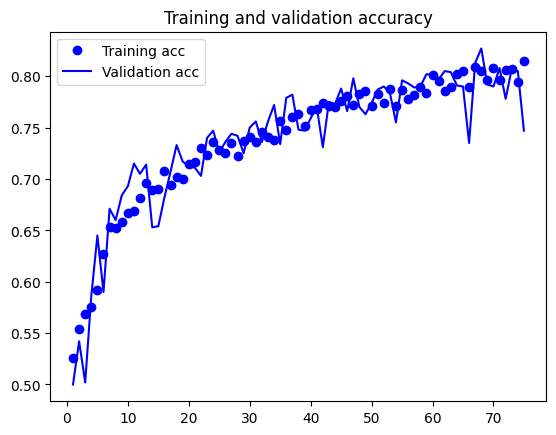

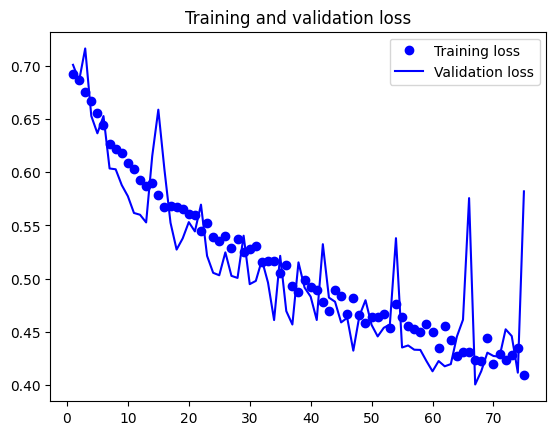

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
history_dict = history.history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Step 3: Using a Pretrain Convet

Part 1: Extracting features using the pretrain convolution base

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top= False,
                  input_shape = (150, 150, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
import numpy as np
from tensorflow import keras
import os
import numpy as np


train_dir = '/content/drive/MyDrive/kaggle_original_data/train'
test_dir = '/content/drive/MyDrive/kaggle_original_data/test'
validation_dir = '/content/drive/MyDrive/kaggle_original_data/validation'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):

    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size= (150,150),
        batch_size = batch_size,
        class_mode = 'binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      print(i)
      if i * batch_size >= sample_count:
        break ## beacause generators yield data indefinitely in a loop, you must break after every image has been seen once
    return features, labels


train_features, train_labels =  extract_features(train_dir, 2000)
validation_features, validation_labels =  extract_features(validation_dir, 1000)
test_features, test_labels =  extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 7s 7s/step
1
1/1 [==============================] - 4s 4s/step
2
1/1 [==============================] - 5s 5s/step
3
1/1 [==============================] - 4s 4s/step
4
1/1 [==============================] - 6s 6s/step
5
1/1 [==============================] - 4s 4s/step
6
1/1 [==============================] - 6s 6s/step
7
1/1 [==============================] - 4s 4s/step
8
1/1 [==============================] - 6s 6s/step
9
1/1 [==============================] - 4s 4s/step
10
1/1 [==============================] - 6s 6s/step
11
1/1 [==============================] - 4s 4s/step
12
1/1 [==============================] - 6s 6s/step
13
1/1 [==============================] - 4s 4s/step
14
1/1 [==============================] - 6s 6s/step
15
1/1 [==============================] - 4s 4s/step
16
1/1 [==============================] - 6s 6s/step
17
1/1 [==============================] - 4s 4s/step
18
1/1 [========

In [ ]:
test_features

array([[[[0.99744397, 0.        , 0.05805275, ..., 0.        ,
          0.41013244, 0.        ],
         [0.59508324, 0.        , 0.87754995, ..., 0.        ,
          0.46168372, 0.        ],
         [0.01085092, 0.        , 1.96950197, ..., 0.        ,
          0.34527478, 0.        ],
         [0.66971636, 0.        , 1.80801821, ..., 0.        ,
          0.35352147, 0.        ]],

        [[0.54474872, 0.        , 0.80928099, ..., 0.        ,
          0.48456174, 0.        ],
         [0.38796011, 0.        , 1.6575613 , ..., 0.        ,
          0.34915847, 0.        ],
         [0.        , 0.        , 2.59811854, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 2.6129148 , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.77356005, ..., 0.        ,
          0.65277791, 0.        ],
         [0.51386786, 0.        , 0.91825485, ..., 0.        ,
          0.75367212, 0.        ],
         [0.5600

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features =  np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=2e-5),
              metrics = ['accuracy'])

history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels)
                    )


Epoch 1/30
100/100 [==============================] - 5s 42ms/step - loss: 0.6649 - accuracy: 0.7685 - val_loss: 0.2655 - val_accuracy: 0.8940
Epoch 2/30
100/100 [==============================] - 4s 37ms/step - loss: 0.3356 - accuracy: 0.8530 - val_loss: 0.6900 - val_accuracy: 0.7250
Epoch 3/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2853 - accuracy: 0.8780 - val_loss: 0.2966 - val_accuracy: 0.8770
Epoch 4/30
100/100 [==============================] - 2s 21ms/step - loss: 0.2421 - accuracy: 0.9020 - val_loss: 0.3836 - val_accuracy: 0.8490
Epoch 5/30
100/100 [==============================] - 2s 20ms/step - loss: 0.2340 - accuracy: 0.9035 - val_loss: 0.2642 - val_accuracy: 0.9050
Epoch 6/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2019 - accuracy: 0.9190 - val_loss: 0.3437 - val_accuracy: 0.8770
Epoch 7/30
100/100 [==============================] - 2s 19ms/step - loss: 0.1777 - accuracy: 0.9320 - val_loss: 0.3107 - val_accuracy: 0.8980

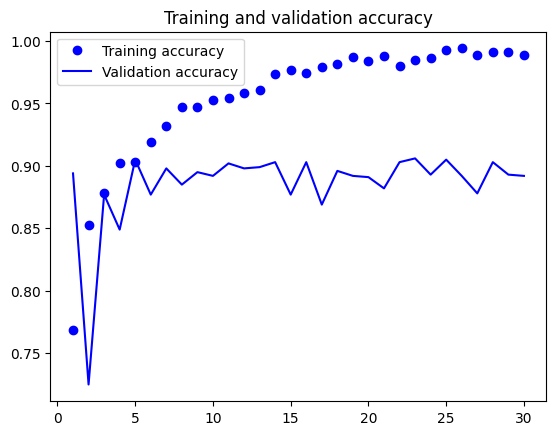

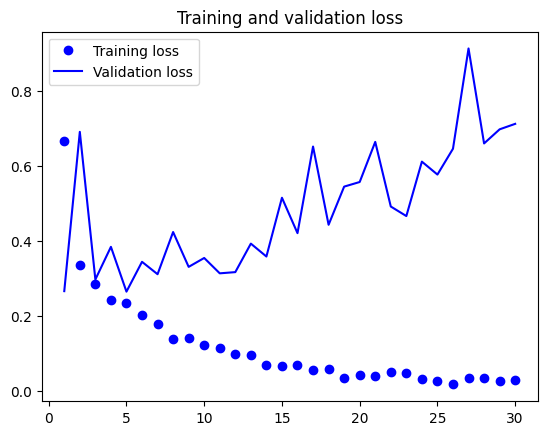

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()